# Taller de Investigación
## Trabajando con la simulación semianalitica mini

La idea inicial, lectura de archivos, calculo de distrancia entre halos e identificación de las caracteristicas del ambiente. 

In [3]:
import numpy as np
import h5py                                      #que pasa con hdf5? 
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Lectura de archivos
Primero la lectura de datos: A continuación solo llama columnas de ID, X, Y, Z (trabajo con la pato)

In [4]:
datos = np.genfromtxt("DATA/sussing_125.z0.000.AHF_halos", usecols=[0,3,5,6,7], names=True)
#datos

Clase de lectura de archivos, donde se requieren las columnas iniciales de interes de los archis, se lee el tipo hdf5 y se guarda la información asociada a un halo en particular. 

In [5]:
class read_file: 
    
    def __init__(self, path, file, columns=None):
        if columns is not None:
            self.cols = columns
        else:
            self.cols     = [0, 1, 2, 3, 5, 6, 7]                #ID, hosthalo, substruc, masa y posiciones xyz
            
        self.path = path; self.file = file; self.read()
        
    def read(self):
        if self.file == "*.hdf5":
            print("No se ha hecho esta parte")
        else:
            data = np.genfromtxt(str(self.path+self.file), usecols = self.cols, names=True)   
            self.data = np.array([list(row) for row in data])#para poder hacer slicing
            
    def halo_info(self, index, info=False): 
        self.hinfo = self.data[index]
        return(self.hinfo)

Ejemplo de lectura de archivos

In [51]:
sussing_125 = read_file("DATA/", "sussing_125.z0.000.AHF_halos")

Ahora se realizan calculos de distancia y velocidades. 

In [52]:
class kinetic:                                   #cinematica entre dos halos
    
    def __init__(self, halo1, halo2):            #halo1 y halo22 son objetos de read_file (halo_info)  
        self.halo1 = halo1; self.halo2 = halo2     

    def distance(self): 
        posA = self.halo1[4:]; posB = self.halo2[4:]
        return(np.linalg.norm(posA-posB))
    
    #def velocity(self, , halo2): 
        #return(np.linalg.norm(halo1-halo2))
    
#preguntal al profe sobre los cambios que sugirió.

In [8]:
distancia = kinetic(sussing_125.halo_info(15), sussing_125.halo_info(20))#.distance()
#distancia.distance()

### Tarea I: gráfica de halos vs masa
Primero, vamos como es para el ultimo de l snapshots de la sumulación: 

In [48]:
datos = sussing_125.data[sussing_125.data[:,1] == 0] 

array([[1.26420031e+10, 0.00000000e+00, 7.20000000e+01, ...,
        5.21028381e+05, 9.32746399e+05, 4.26475647e+05],
       [1.26420031e+10, 0.00000000e+00, 8.00000000e+00, ...,
        5.19935242e+05, 9.33129761e+05, 4.27102142e+05],
       [1.26420031e+10, 0.00000000e+00, 2.00000000e+00, ...,
        5.19654602e+05, 9.32959717e+05, 4.27546082e+05],
       ...,
       [1.26426464e+10, 0.00000000e+00, 1.00000000e+00, ...,
        4.81445374e+05, 9.44102600e+05, 4.54402985e+05],
       [1.26426464e+10, 0.00000000e+00, 1.00000000e+00, ...,
        5.07455994e+05, 9.45348206e+05, 4.50962280e+05],
       [1.26426464e+10, 0.00000000e+00, 1.00000000e+00, ...,
        5.09932861e+05, 9.50948120e+05, 4.51004578e+05]])

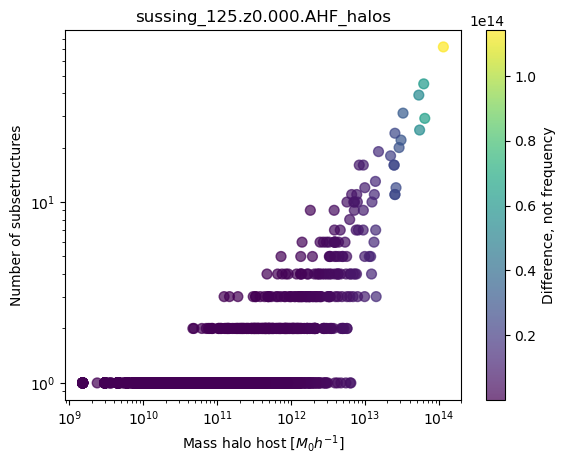

In [10]:
dis = np.sqrt(datos[:,3]**2 + datos[:,2]**2)

fig, ax = plt.subplots()
plt.xscale('log'); plt.yscale('log')
ax.set_xlabel(r'Mass halo host [$M_{0}h^{-1}$]')
ax.set_ylabel("Number of subsetructures")
ax.set_title('sussing_125.z0.000.AHF_halos')
scatter = ax.scatter(datos[:,3], datos[:,2], c=dis, s=50, alpha=0.7)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Difference, not frequency')

plt.show()

Teniendo en cuenta todos los archivos y snapshots en la simulación. 

In [11]:
import glob #La idea es leer todos los datos de la mini
archivos = glob.glob('DATA/'+'sussing*.z0.*_halos*')
archivos = [archivo.replace('DATA/', '') for archivo in archivos]

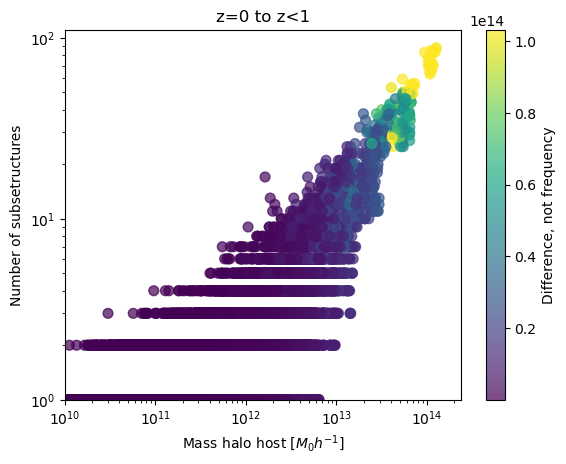

In [12]:
fig, ax1 = plt.subplots()

column_width = 1e1

for i in range(len(archivos)):
    j = read_file('DATA/', archivos[i])
    j = j.data[j.data[:,1] == 0] 

    dist = np.sqrt(j[:,3]**2 + j[:,2]**2)
    scatter = ax1.scatter(j[:,3], j[:,2], c=dist, cmap='viridis', s=50, marker='o', alpha=0.7)

ax1.set_xlabel(r'Mass halo host [$M_{0}h^{-1}$]')
ax1.set_ylabel("Number of subsetructures")
ax1.set_title('z=0 to z<1')
plt.xscale('log'); plt.yscale('log')

plt.xlim(1e10,)
plt.ylim(1,)

cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Difference, not frequency')
plt.show()

### Tarea 2: plot hist 2d 

Primero histograma

In [55]:
from matplotlib import rcParams, colors, ticker, cm

# Solo considera valores positivos
ejeX = datos[:,3]; ejeY = datos[:,2]
nz = (ejeX>0)&(ejeY>0)

In [56]:
#se define el histograma 2D el eje x en log, pero no y
H, xedges, yedges = np.histogram2d(np.log10(ejeX[nz]), 
                                   ejeY[nz], bins=100)

#enmascara el histograma (centra cada bin)
H = np.ma.masked_where(H<=0, H)
x = (xedges[1:]+xedges[:-1])/2
y = (yedges[1:]+yedges[:-1])/2

Text(0, 0.5, 'Number of subsetructures')

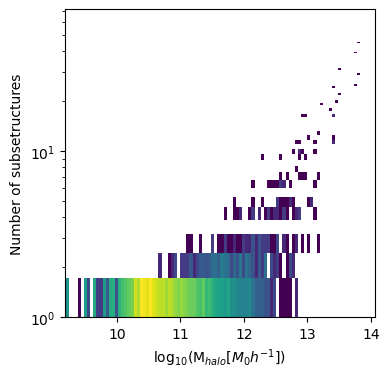

In [57]:
# Grafico con bines: 
fig, ax = plt.subplots(1,1, figsize=(4, 4))

X,Y = np.meshgrid(x,y)
hist2D = H.T/(xedges[1]-xedges[0])/(yedges[1]-yedges[0])

cs = ax.imshow(H.T, origin="lower", cmap=cm.viridis, 
               norm=colors.LogNorm(vmin=1),
               extent=[xedges[0], xedges[-1], yedges[0],yedges[-1]], 
               aspect='auto', interpolation='nearest') 

plt.yscale('log')
ax.set_xlabel(r'log$_{10}$(M$_{halo}$[$M_{0}h^{-1}$])')
ax.set_ylabel("Number of subsetructures")

Ahora como densidades e isocontornos

In [16]:
'''
fig, ax2 = plt.subplots(1,1)

H, xedges, yedges = np.histogram2d(np.log10(ejeX[nz]), np.log10(ejeY[nz]), 
                                   bins=40)

X,Y = np.meshgrid(x,y)
hist2D = H.T/(xedges[1]-xedges[0])/(yedges[1]-yedges[0])
   
levels = np.array([0.001, 0.02, 0.05, 0.1, 
                   0.3, 0.5, 0.95, 0.997])

ticks = levels*hist2D.max()

# filled areas:
#cs = ax.contourf(X, Y, hist2D, ticks, cmap=cm.Reds, zorder=1,
#                 norm=colors.Normalize(vmin=0.1*hist2D.max(), 
#                                       vmax=1.2*hist2D.max()))

cs = ax.contourf(X, Y, hist2D, ticks, cmap=cm.Reds, zorder=1,
                 norm=colors.Normalize(vmin=0.1*hist2D.max(), 
                                       vmax=1.2*hist2D.max()))


cs = ax.imshow(H.T, origin="lower", cmap=cm.viridis, norm=colors.LogNorm(vmin=1),
               extent=[xedges[0], xedges[-1], yedges[0],yedges[-1]], 
               aspect='auto', interpolation='nearest') 

# white lines:
cs = ax.contour(X, Y, hist2D, ticks, colors='white', 
                linewidths=0.5, zorder=1, 
                norm=colors.Normalize(vmin=0.1*hist2D.max(), 
                                      vmax=1.2*hist2D.max()))

#plt.yscale('log')
ax.set_xlabel(r'Mass halo host [$M_{0}h^{-1}$]')
ax.set_ylabel("Number of subsetructures")'''

'\nfig, ax2 = plt.subplots(1,1)\n\nH, xedges, yedges = np.histogram2d(np.log10(ejeX[nz]), np.log10(ejeY[nz]), \n                                   bins=40)\n\nX,Y = np.meshgrid(x,y)\nhist2D = H.T/(xedges[1]-xedges[0])/(yedges[1]-yedges[0])\n   \nlevels = np.array([0.001, 0.02, 0.05, 0.1, \n                   0.3, 0.5, 0.95, 0.997])\n\nticks = levels*hist2D.max()\n\n# filled areas:\n#cs = ax.contourf(X, Y, hist2D, ticks, cmap=cm.Reds, zorder=1,\n#                 norm=colors.Normalize(vmin=0.1*hist2D.max(), \n#                                       vmax=1.2*hist2D.max()))\n\ncs = ax.contourf(X, Y, hist2D, ticks, cmap=cm.Reds, zorder=1,\n                 norm=colors.Normalize(vmin=0.1*hist2D.max(), \n                                       vmax=1.2*hist2D.max()))\n\n\ncs = ax.imshow(H.T, origin="lower", cmap=cm.viridis, norm=colors.LogNorm(vmin=1),\n               extent=[xedges[0], xedges[-1], yedges[0],yedges[-1]], \n               aspect=\'auto\', interpolation=\'nearest\') \n\n# white

### Tarea 3: Gráfico de massa de los halos

In [17]:
from astropy.cosmology import WMAP9 as cosmo
from astropy import constants as const

In [18]:
masa = np.genfromtxt("DATA/sussing_125.z0.000.AHF_halos", usecols=[3])
#plt.hist(np.log10(masa[:,3]))
masa

array([1.1418e+14, 6.1737e+12, 4.7089e+12, ..., 1.6560e+10, 1.6560e+10,
       5.4195e+10])

In [19]:
Mass = sussing_125.data[:,3]

#Histograma: 
n_bins         = 15; cte = 1000                 # Mpc/h ojo h=0.6777
counts, edges  = np.histogram(np.log10(Mass), 
                              bins=n_bins)

#phi:
def phi(D_n, edges, constante):
    width = edges[1]-edges[0]                   # Anchos constantes? 
    fi = (D_n/(width))/(constante**3)
    return fi

fi    = phi(counts, edges, cte)

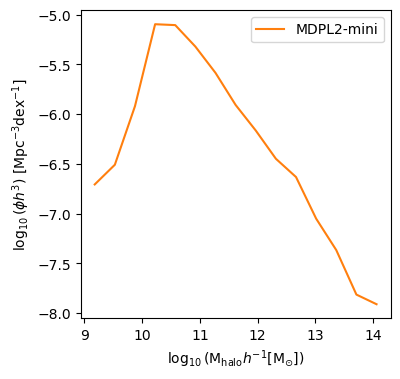

In [20]:
# Grafico con bines: 
fig, ax = plt.subplots(1,1, figsize=(4, 4))

exe_x = np.linspace(np.log10(min(Mass)), 
                    np.log10(max(Mass)), num=n_bins)

ax.plot(exe_x,np.log10(fi), color='C1', label="MDPL2-mini")

ax.set_xlabel(r'$\log_{10}$(M$_{\mathrm{halo}}h^{-1}$[$\mathrm{M}_{\odot}$])')
ax.set_ylabel(r'$\log_{10}(\phi h^{3})$ [Mpc$^{-3}$dex$^{-1}$]')
plt.legend()

In [42]:
otros = np.genfromtxt("DATA/sussing_125.z0.000.AHF_halos", usecols=[2,3], names=True)
otros[:,0]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [35]:
datos[:,2].tolist() == otros[:,0].tolist()


False

In [37]:
len(otros[:,0].tolist())

9002